Gene Expression:

Gene expression is the process by which information from a gene is used to synthesize a functional gene product, such as a protein or RNA molecule. In the context of genomics, gene expression often refers to the transcription of DNA into RNA and, in the case of protein-coding genes, the translation of RNA into proteins.

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sys

In [ ]:
# Increase recursion limit to avoid potential issues
sys.setrecursionlimit(10000)

By increasing the recursion limit, allow the algorithm to recurse deeper into the hierarchical clustering process without encountering a recursion limit error. This is a precautionary measure to handle cases where the hierarchical clustering tree is deep and might exceed the default recursion limit.

In [ ]:
# Load the data
trans_cts = pd.read_csv("counts_transformed.csv")
sample_info = pd.read_csv("sample_info.csv")
test_result = pd.read_csv("test_result.csv")

In [ ]:
test_result.head(10)

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,comparison
0,SPAC212.11,8.552427,1.540908,0.497028,1.088284,0.276470,1.0,15
1,SPAC212.09c,50.762750,0.398515,0.272746,0.000000,1.000000,1.0,15
2,SPAC212.04c,38.316893,-0.022988,0.268759,-0.000000,1.000000,1.0,15
3,SPNCRNA.601,9.466153,-0.084133,0.483439,-0.000000,1.000000,1.0,15
4,SPAC977.11,70.413030,-0.818901,0.201126,-0.000000,1.000000,1.0,15
5,SPAC977.13c,36.737444,1.189876,0.343804,0.552279,0.580757,1.0,15
6,SPAC977.15,49.077476,0.599691,0.207897,0.000000,1.000000,1.0,15
7,SPAC977.16c,83.194045,0.147858,0.238610,0.000000,1.000000,1.0,15
8,SPNCRNA.607,60.427442,0.063774,0.267583,0.000000,1.000000,1.0,15
9,SPAC1F8.06,74.248460,-1.578275,0.297548,-1.943469,0.051959,1.0,15


**Gene:** Represents the gene identifier or name.

**baseMean:** A measure of the average expression level across samples. The mean of the expression levels of a gene across different samples refers to the average amount of RNA or protein produced by a specific gene in a set of biological samples.

**log2FoldChange:** This column represents the log2 fold change, which is a measure of how much the expression of a gene changes between two conditions. A positive value indicates upregulation, while a negative value indicates downregulation.

**lfcSE:**The standard error associated with the log2 fold change. It gives you an idea of how much you should trust the calculated log2 fold change for a particular gene.

**stat:** This column contains the test statistic associated with the significance of the log2 fold change. It's often used in hypothesis testing to determine whether the observed changes are statistically significant.

**pvalue:** The p-value is a measure of the evidence against a null hypothesis. In the context of gene expression analysis, it helps assess whether the observed changes in gene expression are statistically significant.

**padj:** This is the adjusted p-value, which takes into account multiple comparisons. It's common to adjust p-values to control the false discovery rate when performing tests on a large number of genes.

**comparison:** This column may indicate the specific comparison or condition contrast for which the differential expression was calculated. It could be a label or identifier for the comparison being made.

In [ ]:
trans_cts

,gene,wt_0_r1,wt_0_r2,wt_0_r3,wt_15_r1,wt_15_r2,wt_15_r3,wt_30_r1,wt_30_r2,wt_30_r3,...,mut_30_r3,mut_60_r1,mut_60_r2,mut_60_r3,mut_120_r1,mut_120_r2,mut_120_r3,mut_180_r1,mut_180_r2,mut_180_r3
0,SPAC212.11,4.947329,4.969572,5.657995,5.452545,5.444799,6.501252,5.078831,5.254861,5.324121,...,5.159419,4.198365,4.814510,4.479142,4.626784,4.198365,4.982007,4.771719,5.120524,5.133387
1,SPAC212.09c,5.443589,6.205209,6.172470,5.943911,6.333457,6.405294,6.711639,7.146486,6.932336,...,6.397075,5.904782,6.736746,6.738822,6.204220,6.450939,6.074706,6.312575,5.844352,6.642189
2,SPAC212.04c,5.751174,5.058125,5.544557,5.675589,5.175381,5.101433,5.823344,6.313480,6.595747,...,7.037313,6.502084,6.676172,6.195201,6.079169,6.587410,6.353333,6.367720,6.095238,6.140221
3,SPNCRNA.601,5.731843,4.868198,4.936256,5.569892,5.319763,4.198365,5.168548,4.772003,5.078932,...,4.731504,4.596343,5.114169,4.984030,5.046105,5.336696,5.034690,4.530838,5.343809,5.205497
4,SPAC977.11,7.046601,6.837324,6.788719,6.870560,6.092104,6.189225,6.908198,6.658501,6.932336,...,6.887455,6.126212,6.402201,6.551686,6.694729,6.205730,6.607223,6.895860,7.053500,6.878922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,SPMITTRNATYR.01,10.344469,9.874783,9.997327,10.184409,10.849839,10.074988,10.688237,10.017204,9.808898,...,10.531540,10.855071,9.998807,9.878177,10.864730,10.274954,10.269906,10.773391,10.591472,9.997940
6007,SPMITTRNAILE.02,9.714589,8.808236,8.759882,10.006076,9.565748,9.248798,10.430030,9.599744,9.822080,...,9.668753,10.329804,9.821727,9.320962,10.310816,9.976556,9.609017,9.495380,9.478843,9.295549
6008,SPMIT.10,13.800896,13.532265,13.455241,13.947313,13.879678,13.567957,14.076181,13.722708,13.333568,...,13.650777,13.705757,13.396722,13.066223,13.802491,13.740311,13.622156,13.893013,13.871211,13.383622
6009,SPMITTRNAGLU.01,13.142318,12.404659,12.442552,14.161608,14.075230,13.821331,14.142820,13.448203,13.184850,...,13.832365,14.109781,13.512049,13.110932,13.767995,13.100830,13.160030,13.974090,13.233097,13.179396


**Gene Expression Values:** The columns from "wt_0_r1" to "mut_180_r3" represent different samples or conditions, and each row corresponds to a specific gene. The numerical values in these columns represent the expression levels of genes in the corresponding samples.

**Experimental Conditions:** The dataset involves different experimental conditions denoted by prefixes like "wt" (wild type) and "mut" (mutant). Different time points (e.g., 0, 15, 30, 60, 120, 180) may represent time-course measurements.

**Gene Identifier:** The "gene" column contains unique identifiers or names for each gene, facilitating the identification of specific genes in the dataset.

**Sample Replicates:** Replicate measurements (e.g., "wt_0_r1," "wt_0_r2," etc.) indicate repeated measurements or replicates for each condition. Replicates help assess the variability and reliability of the gene expression measurements.


In [ ]:
sample_info.head(10)

,sample,strain,minute,replicate
0,wt_0_r1,wt,0,r1
1,wt_0_r2,wt,0,r2
2,wt_0_r3,wt,0,r3
3,wt_15_r1,wt,15,r1
4,wt_15_r2,wt,15,r2
5,wt_15_r3,wt,15,r3
6,wt_30_r1,wt,30,r1
7,wt_30_r2,wt,30,r2
8,wt_30_r3,wt,30,r3
9,wt_60_r1,wt,60,r1


**sample:** This column contains unique identifiers for each sample in your dataset.
Each entry is a combination of information about the strain, time point, and replicate for a specific measurement. For example, "wt_0_r1" represents a wild-type (wt) sample taken at 0 minutes and is the first replicate (r1) of that condition.

**strain:**Indicates the genetic strain or type of the organism. In this case, it can be either "wt" (wild type) or "mut" (mutant).
Helps differentiate between different genetic backgrounds or experimental conditions.

**minute:** Represents the time point at which the sample was collected, measured in minutes.
Time points include 0, 15, 30, 60, 120, and 180 minutes in your dataset.
Indicates the specific time during an experiment when gene expression was measured.

**replicate:** Denotes the replicate number for a given combination of strain and time point.
Replicates are repeated measurements or experimental runs under the same conditions to account for variability and ensure reliability.
For example, "r1" represents the first replicate, "r2" is the second replicate, and so on.

In [ ]:
# Display the column names in trans_cts and sample_info
print("Column names in trans_cts:", trans_cts.columns)
print("Column names in sample_info:", sample_info.columns)

# Melt the trans_cts DataFrame to have a 'sample' column
trans_cts_melted = trans_cts.melt(id_vars='gene', var_name='sample', value_name='expression')

# Merge trans_cts_melted and sample_info based on common column 'sample'
merged_data = pd.merge(trans_cts_melted, sample_info, on='sample')

# Display the merged_data
print("Merged Data:")
print(merged_data.head())


Column names in trans_cts: Index(['gene', 'wt_0_r1', 'wt_0_r2', 'wt_0_r3', 'wt_15_r1', 'wt_15_r2',
       'wt_15_r3', 'wt_30_r1', 'wt_30_r2', 'wt_30_r3', 'wt_60_r1', 'wt_60_r2',
       'wt_60_r3', 'wt_120_r1', 'wt_120_r2', 'wt_120_r3', 'wt_180_r1',
       'wt_180_r2', 'wt_180_r3', 'mut_0_r1', 'mut_0_r2', 'mut_0_r3',
       'mut_15_r1', 'mut_15_r2', 'mut_15_r3', 'mut_30_r1', 'mut_30_r2',
       'mut_30_r3', 'mut_60_r1', 'mut_60_r2', 'mut_60_r3', 'mut_120_r1',
       'mut_120_r2', 'mut_120_r3', 'mut_180_r1', 'mut_180_r2', 'mut_180_r3'],
      dtype='object')
Column names in sample_info: Index(['sample', 'strain', 'minute', 'replicate'], dtype='object')
Merged Data:
          gene   sample  expression strain  minute replicate
0   SPAC212.11  wt_0_r1    4.947329     wt       0        r1
1  SPAC212.09c  wt_0_r1    5.443589     wt       0        r1
2  SPAC212.04c  wt_0_r1    5.751174     wt       0        r1
3  SPNCRNA.601  wt_0_r1    5.731843     wt       0        r1
4   SPAC977.11  wt_0_r1

Merged Data: The code melted (reshaped) your gene expression data (trans_cts) using the 'gene' column as the identifier. This transformation converted the wide-format data to long-format, creating new columns 'sample' and 'expression'. Then, it merged this melted data with the sample information (sample_info) based on the common 'sample' column.

The resulting dataset (merged_data) now contains information about each gene's expression level ('expression') for each sample, along with additional details such as 'strain', 'minute', and 'replicate'.

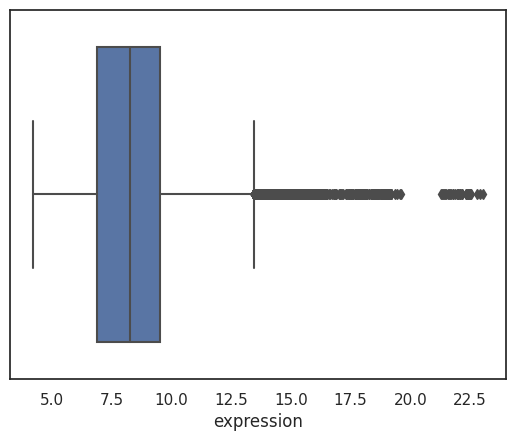

In [ ]:
# Check for missing values in the merged dataset
merged_data.isnull().sum()

# Check for outliers in the merged dataset
sns.boxplot(x='expression', data=merged_data)
plt.show()

points are outside the whiskers but close to each other, it might indicate interesting patterns or substructures in data.

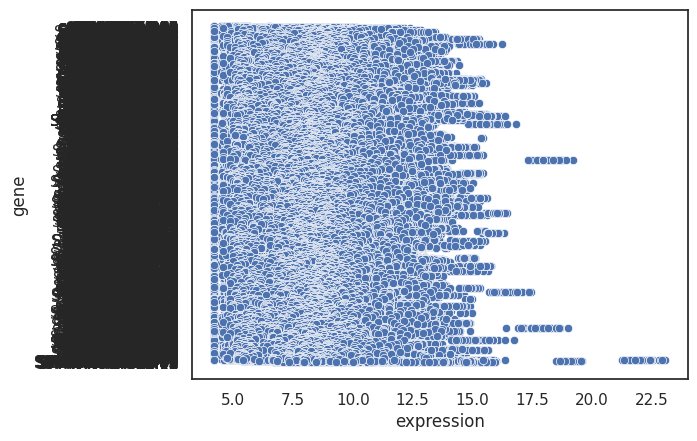

In [ ]:
sns.scatterplot(x='expression', y='gene', data=merged_data)
plt.show()


In [ ]:
from scipy.stats import zscore

# Assuming 'expression' is the column with gene expression values
merged_data['zscore'] = zscore(merged_data['expression'])
merged_data['zscore']

0        -1.664794
1        -1.423332
2        -1.273673
3        -1.283079
4        -0.643367
            ...   
216391    0.792644
216392    0.450887
216393    2.439990
216394    2.340621
216395    2.620170
Name: zscore, Length: 216396, dtype: float64

In [ ]:
threshold = 2
outliers = merged_data[abs(merged_data['zscore']) > threshold]


In [ ]:
# Remove outliers
merged_data = merged_data[abs(merged_data['zscore']) <= threshold]


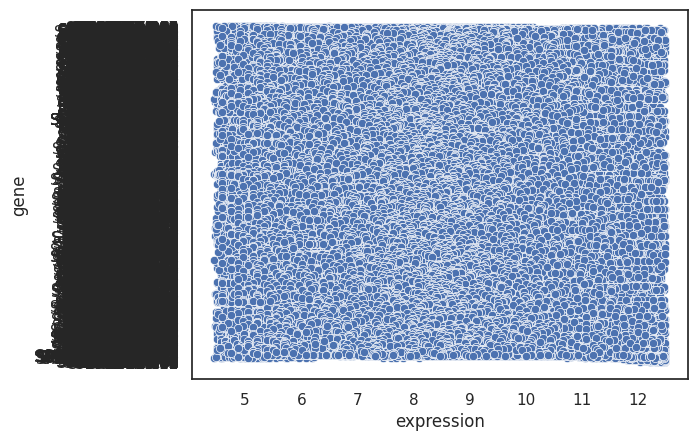

In [ ]:
sns.scatterplot(x='expression', y='gene', data=merged_data)
plt.show()


In [ ]:
small_data = merged_data.sample(frac=0.1)
# used to create a random sample (small_data) from the original dataset

In [ ]:
# Select candidate genes based on a significance threshold (padj < 0.01) from the test results
candidate_genes = test_result.loc[test_result['padj'] < 0.01, 'gene'].unique()

#Here, candidate genes are selected based on a significance threshold (padj < 0.01) from the test results.
# The code is looking at the results of a statistical test. In this case, it's checking if the adjusted p-value (padj) for each gene is less than 0.01.
# So, when it says "selecting candidate genes based on a significance threshold (padj < 0.01)," it means the code is picking genes that have very low p-values,
#indicating that the observed differences in gene expression are likely not due to random chance.
# So, the code is looking for genes that make a noticeable difference in how things (in this case, genes) work when conditions change.


In [ ]:
# Summarize gene expression by scaling the counts and calculating the mean
trans_cts_filtered = (
    small_data.query("gene in @candidate_genes")
    .groupby(['gene', 'strain', 'minute'])
    .agg(mean_cts_scaled=('expression', np.mean),
         nrep=('expression', 'count'))
    .reset_index()
)

# #Filtering Data: It looks at a smaller subset of data (small_data) and focuses on genes that
# were found to be significant in a statistical test (the genes where the adjusted p-value is less than 0.01).

# Grouping and Averaging: For each of these significant genes, it groups them based on two factors:
# 'strain' and 'minute' (these might represent different experimental conditions or time points).
# Then, for each group, it calculates the average (mean) expression level of that gene. Additionally,
#  it counts how many replicates (individual measurements) there are for each gene in each group.

# Creating a New DataFrame: It puts all this information into a new DataFrame called trans_cts_filtered.
# This new DataFrame shows, for each significant gene, the average expression level in different experimental
# conditions (strain and minute), and it tells you how many measurements (replicates) were used to calculate each average.

In [ ]:

# Create a matrix
hclust_matrix = trans_cts_filtered.pivot_table(index=['gene', 'strain', 'minute'], values='mean_cts_scaled', aggfunc='mean')
hclust_matrix


mean_cts_scaled
gene         strain minute                 
SPAC1002.17c wt     0              6.023650
                    60             9.280121
                    120            6.145073
SPAC1002.18  mut    60            10.594297
             wt     60             9.722078
...                                     ...
SPNCRNA.935  mut    120            5.940118
                    180            5.881342
SPNCRNA.974  mut    180            5.641489
             wt     0              5.961123
                    30             6.818544

[1139 rows x 1 columns]

Gene: Represents a specific gene in the organism's genome.

Strain: Denotes a particular genetic variant or type of the organism.

Minute (Time): Indicates the time point at which the gene expression was measured.

Mean_cts_scaled: This column contains the scaled and averaged expression levels of genes. The term "scaled" usually implies that some normalization or transformation has been applied to the raw expression values. This scaling is often done to make the data comparable and to remove technical variations.

Expression levels signify how much a gene is "turned on" or "active" at a given time point. The values in the "Mean_cts_scaled" column provide a relative measure of the gene's activity compared to other genes in the same dataset. Higher values generally indicate higher expression, and lower values suggest lower expression.

In [ ]:
# Check for missing or zero standard deviation values and replace with zeros
hclust_matrix_scaled = merged_data.pivot_table(index=['gene', 'strain', 'minute'], values='expression', aggfunc='mean')
hclust_matrix_scaled = hclust_matrix_scaled.apply(lambda x: (x - x.mean()) / x.std() if x.std() != 0 else 0, axis=1)

# Replace NaN or infinite values with zeros
hclust_matrix_scaled.replace([np.inf, -np.inf, np.nan], 0, inplace=True)


In [ ]:
# Scale the data
scaler = StandardScaler()
hclust_matrix_scaled = scaler.fit_transform(hclust_matrix)


Cophenetic Correlation Coefficient for single linkage: 0.6078543914996979


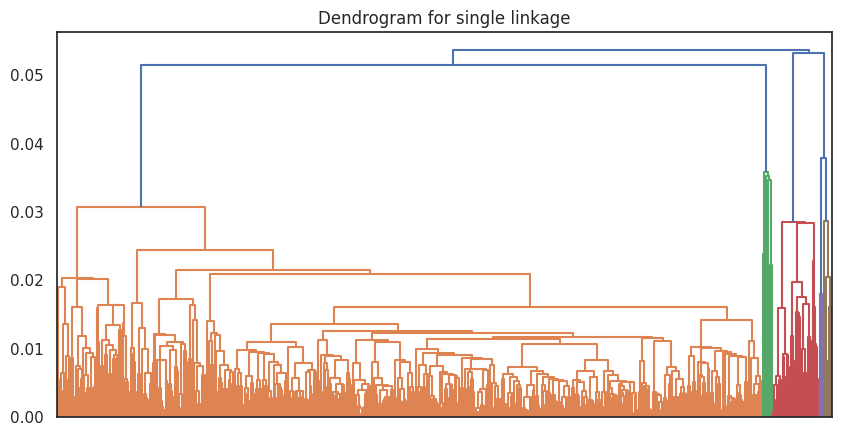

Cophenetic Correlation Coefficient for complete linkage: 0.6652676396748524


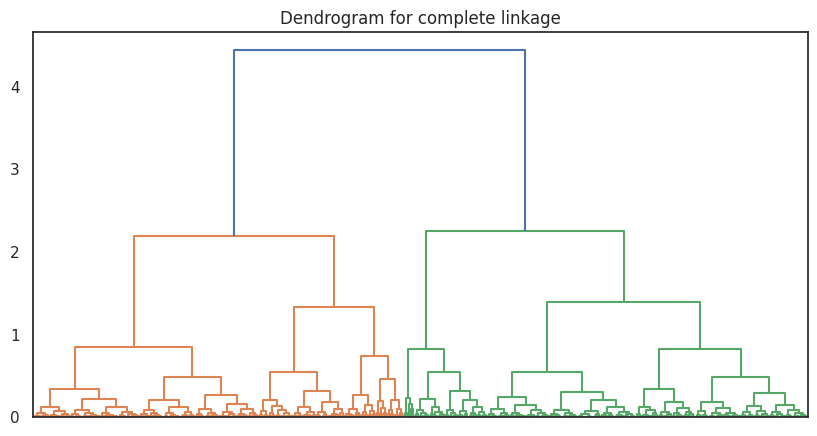

Cophenetic Correlation Coefficient for average linkage: 0.6896850306181668


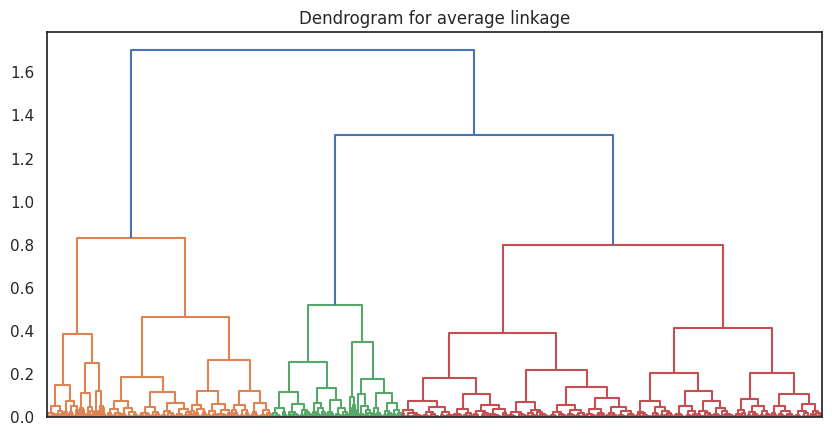

Cophenetic Correlation Coefficient for ward linkage: 0.6728228943345773


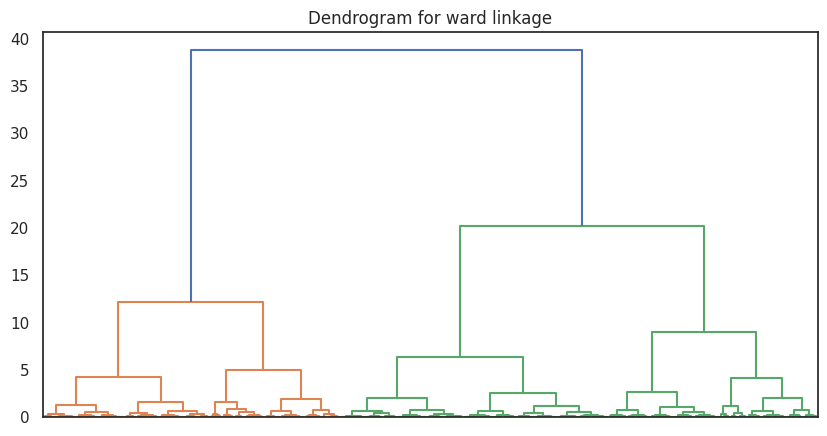

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

# 'hclust_matrix_scaled' is the scaled data matrix
# You can try different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']  # Add more if needed

for method in linkage_methods:
    # Perform hierarchical clustering
    gene_dist = linkage(hclust_matrix_scaled, method=method)

    # Calculate the Cophenetic Correlation Coefficient
    c, coph_dists = cophenet(gene_dist, pdist(hclust_matrix_scaled))

    print(f"Cophenetic Correlation Coefficient for {method} linkage: {c}")

    # Visualize dendrogram if needed
    plt.figure(figsize=(10, 5))
    dendrogram(gene_dist, no_labels=True)
    plt.title(f'Dendrogram for {method} linkage')
    plt.show()


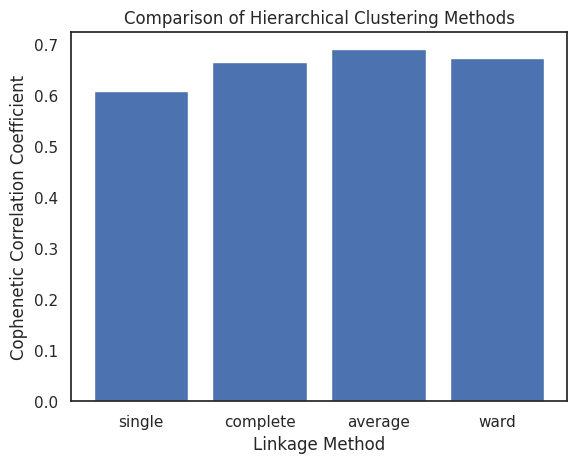

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Define a list of linkage methods to compare
linkage_methods = ['single', 'complete', 'average', 'ward']

# Initialize an empty list to store Cophenetic Correlation Coefficient values
cophenetic_values = []

# Iterate over each linkage method
for method in linkage_methods:
    # Perform hierarchical clustering
    gene_dist = linkage(hclust_matrix_scaled, method=method)

    # Calculate the Cophenetic Correlation Coefficient
    cophenet_coeff, _ = cophenet(gene_dist, pdist(hclust_matrix_scaled))

    # Append the coefficient to the list
    cophenetic_values.append(cophenet_coeff)

# Create a bar plot to compare Cophenetic Correlation Coefficients
plt.bar(linkage_methods, cophenetic_values)
plt.xlabel('Linkage Method')
plt.ylabel('Cophenetic Correlation Coefficient')
plt.title('Comparison of Hierarchical Clustering Methods')
plt.show()


The Cophenetic Correlation Coefficient (CPCC) is a measure of how faithfully a dendrogram preserves the pairwise distances between the original, unmodeled data points. It is used to assess the goodness of fit of a hierarchical clustering solution.

average linkage method has the highest Cophenetic Correlation Coefficientindicate which means a better-preserved pairwise distance structure in the clustering.

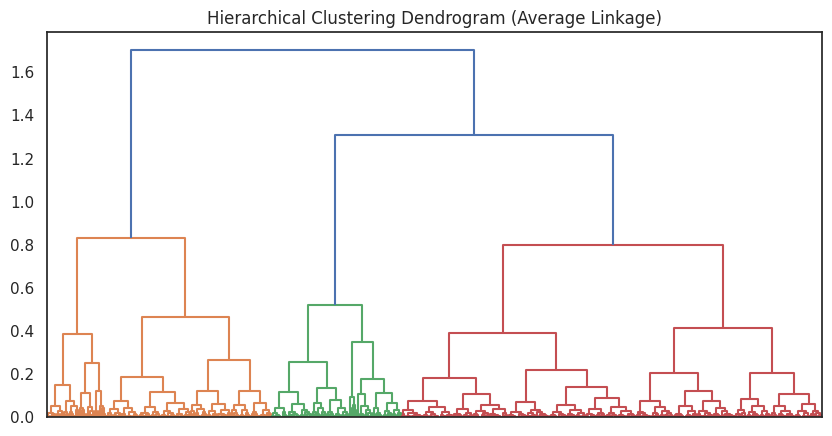

In [ ]:
# Perform hierarchical clustering with complete linkage
gene_dist_complete = linkage(hclust_matrix_scaled, method='average')
# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(gene_dist_complete, no_labels=True)
# plt.axhline(y=1, color='brown', linestyle='--', linewidth=2)  # Add a horizontal line at height 1
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.show()


<ipython-input-89-7721690ecdc8>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cpcc_results = cpcc_results.append({'Cutoff Height': cutoff_height, 'CPCC': cpcc}, ignore_index=True)
<ipython-input-89-7721690ecdc8>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cpcc_results = cpcc_results.append({'Cutoff Height': cutoff_height, 'CPCC': cpcc}, ignore_index=True)
<ipython-input-89-7721690ecdc8>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cpcc_results = cpcc_results.append({'Cutoff Height': cutoff_height, 'CPCC': cpcc}, ignore_index=True)
<ipython-input-89-7721690ecdc8>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cpcc_resul

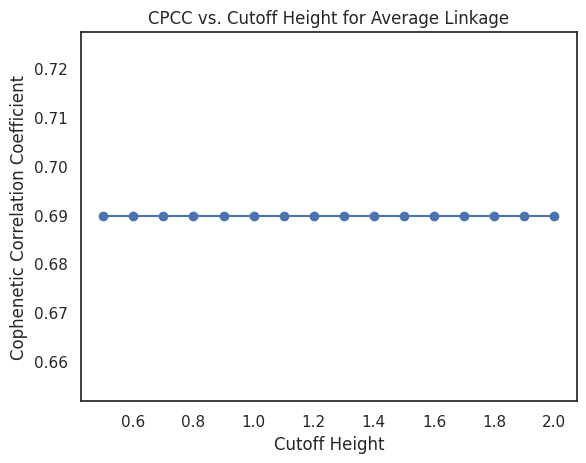

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet, cut_tree

cutoff_heights = np.arange(0.5, 2.1, 0.1)

# Initialize a DataFrame to store results
cpcc_results = pd.DataFrame(columns=['Cutoff Height', 'CPCC'])

for cutoff_height in cutoff_heights:
    # Perform hierarchical clustering with Complete Linkage
    gene_dist = linkage(hclust_matrix_scaled, method='average')

    # Cut the dendrogram at the specified height
    gene_clusters = cut_tree(gene_dist, height=cutoff_height)

    # Calculate the Cophenetic Correlation Coefficient
    cpcc, _ = cophenet(gene_dist, pdist(hclust_matrix_scaled))

    # Store the results in the DataFrame
    cpcc_results = cpcc_results.append({'Cutoff Height': cutoff_height, 'CPCC': cpcc}, ignore_index=True)

# Plot the CPCC values for different cutoff heights
plt.plot(cpcc_results['Cutoff Height'], cpcc_results['CPCC'], marker='o')
plt.xlabel('Cutoff Height')
plt.ylabel('Cophenetic Correlation Coefficient')
plt.title('CPCC vs. Cutoff Height for Average Linkage')
plt.show()


The plot is a constant line and does not show significant variations, it suggests that the clustering results are stable across different cutoff heights, and there might not be a clear optimal cutoff height

<Figure size 1000x500 with 0 Axes>

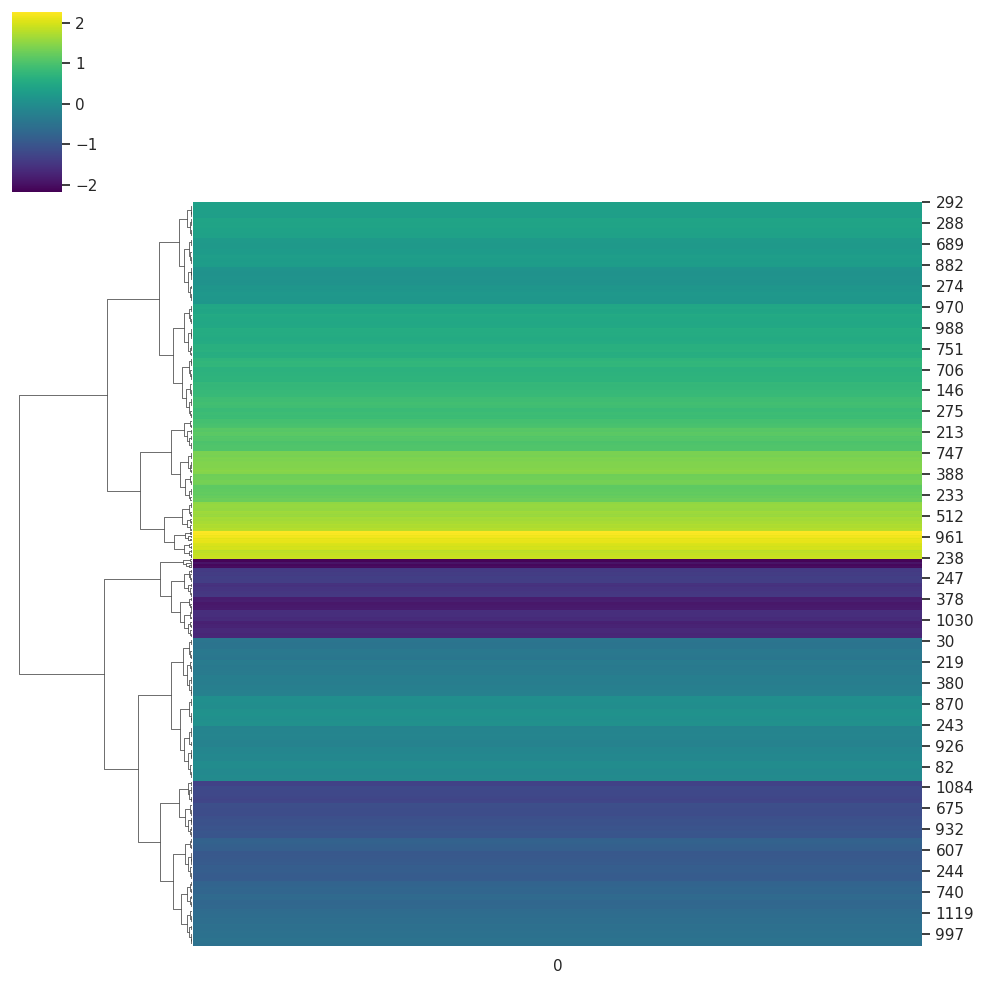

In [ ]:
# Plot with a different colormap
sns.set(style="white")
plt.figure(figsize=(10, 5))
sns.clustermap(hclust_matrix_scaled, method='complete', cmap='viridis', col_cluster=False, row_cluster=True)
plt.show()


Clustermap: Think of a "clustermap" as a map that organizes genes based on how similar their expression patterns are over time. Genes with similar expression patterns will be grouped together.

Gene Clustering:Imagine genes lined up in rows. The clustermap looks at these genes and groups together the ones that behave similarly over the different time points.

Colormap ('Viridis'):The colors on the map represent the expression levels of genes. 'Viridis' is a color scheme that helps us see the different expression values more clearly.

Hierarchical Clustering Along Rows: The genes (rows) are arranged in a way that similar ones are close to each other. This is done through hierarchical clustering, which organizes genes into groups based on their similarities.
So, when you look at the clustermap, you'll see groups of genes (clusters) that share similar expression patterns over time, and the colors indicate how much they are "turned on" or "turned off" at different time points. It's like organizing genes on a map to reveal patterns in their behavior.

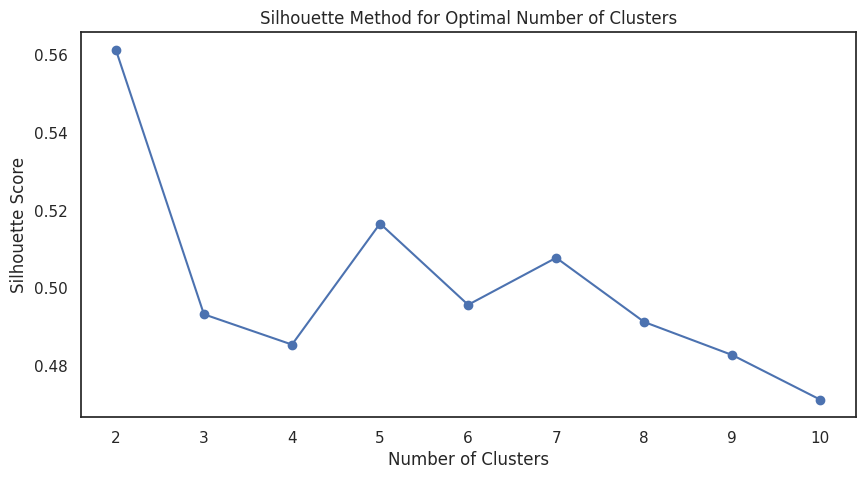

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Assume hclust_matrix_scaled is your data
# Try different numbers of clusters and calculate silhouette scores
silhouette_scores = []

for n_clusters in range(2, 11):  # Adjust the range as needed
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    cluster_labels = clusterer.fit_predict(hclust_matrix_scaled)
    silhouette_avg = silhouette_score(hclust_matrix_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
In this plot, we are looking for the number of clusters that gives the highest silhouette score. The silhouette score provides a quantitative measure of how well-separated the clusters are.

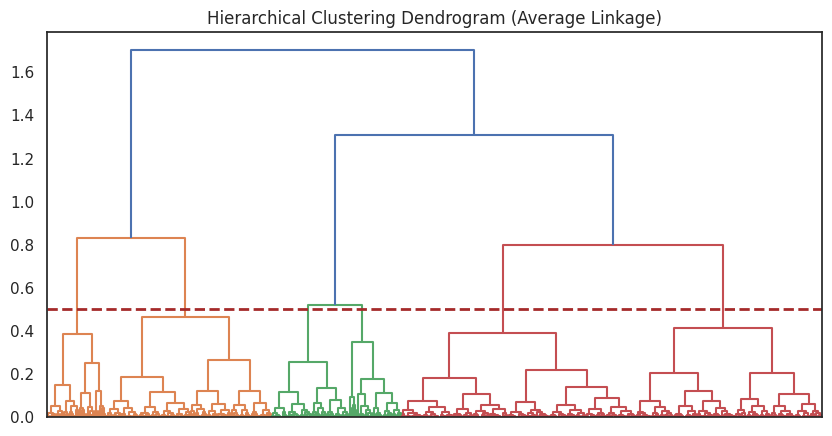

In [ ]:
# Perform hierarchical clustering with complete linkage
gene_dist_complete = linkage(hclust_matrix_scaled, method='average')
# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(gene_dist_complete, no_labels=True)
plt.axhline(y=0.5, color='brown', linestyle='--', linewidth=2)  # Add a horizontal line at height 1
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster


num_clusters = 5

# Use fcluster to assign each observation to a cluster
gene_clusters = fcluster(gene_dist, num_clusters, criterion='maxclust')

# Convert the result to a DataFrame
gene_cluster = pd.DataFrame({'gene': hclust_matrix.index.get_level_values('gene'), 'cluster': gene_clusters})


The creation of the gene_cluster DataFrame is done to associate each gene with its respective cluster assignment obtained from hierarchical clustering. In the context of hierarchical clustering, the goal is to group similar entities (in this case, genes) into clusters based on their expression patterns.

By having this DataFrame, you can easily explore and analyze the clustering results. For example, you might want to examine the distribution of genes across different clusters, identify key genes or visualize the clusters in relation to other features. It provides a convenient format for further downstream analysis and interpretation of the clustering results.

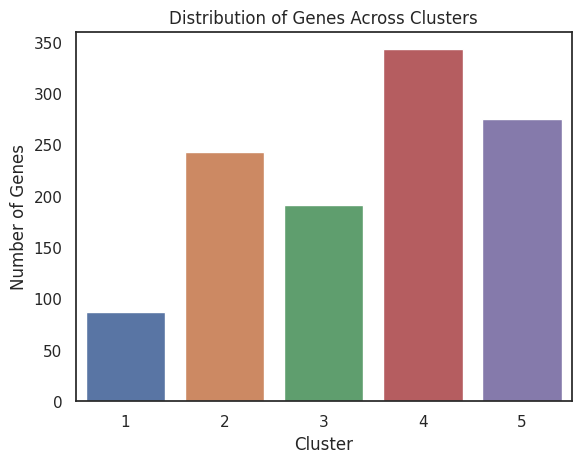

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'gene_cluster' with columns 'gene' and 'cluster'
# where 'cluster' represents the cluster assigned to each gene

# Count the number of genes in each cluster
cluster_counts = gene_cluster['cluster'].value_counts()

# Create a count plot
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Distribution of Genes Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Genes')
plt.show()


This will generate a bar plot where each bar represents a cluster, and the height of the bar represents the number of genes in that cluster

In [ ]:
# Visualize gene expression trends per cluster
trans_cts_cluster = trans_cts_filtered.merge(gene_cluster, on='gene')


<ipython-input-131-a702186166f7>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='minute', y='mean_cts_scaled', hue='cluster', data=trans_cts_cluster, ci=None)


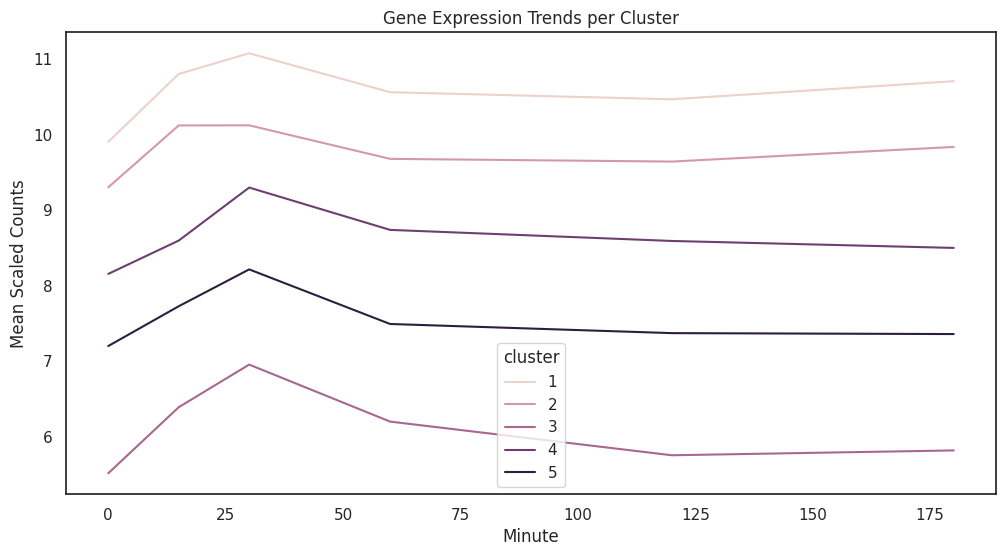

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize gene expression trends per cluster using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='minute', y='mean_cts_scaled', hue='cluster', data=trans_cts_cluster, ci=None)
plt.title('Gene Expression Trends per Cluster')
plt.xlabel('Minute')
plt.ylabel('Mean Scaled Counts')
plt.show()


In simpler terms, the plot shows how the mean gene expression levels change over time (minutes) for different clusters of genes. Each line represents a cluster, helping visually compare their trends.







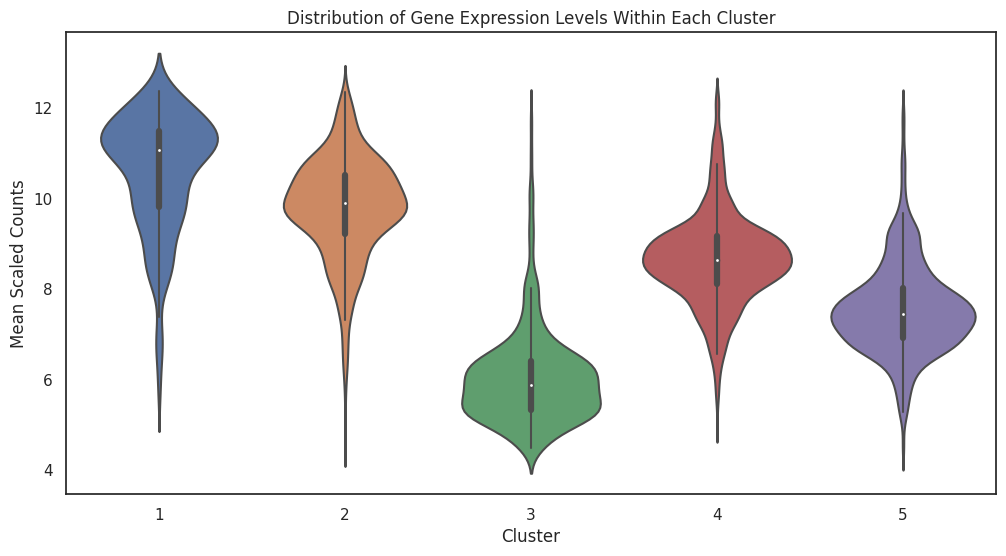

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'trans_cts_cluster' with columns 'gene', 'minute', 'mean_cts_scaled', and 'cluster'
# where 'mean_cts_scaled' represents the gene expression level

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='cluster', y='mean_cts_scaled', data=trans_cts_cluster)
plt.title('Distribution of Gene Expression Levels Within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Scaled Counts')
plt.show()
